In [55]:
%run init_notebook.py

In [56]:
import spacy
import regex as re

import time
from itertools import compress
from collections import Counter
from src.utils import vec_similarity, arr_min_max_scale

In [57]:
from articles import load_pickle, DICT_NARRATIVES

In [58]:
NLP = spacy.load('en_core_web_lg')

# supervised narrative topics

In [121]:
dict_txts = {}
for file in [i for i in os.listdir(TEXT_DIR) if i != 'orig']:
    dict_txts[file] = load_pickle(file)

## analyse

In [35]:
lst_docs = [NLP(i['text']) for i in list(dict_txts.values())[:50]]

In [36]:
LST_FREQUENT_NON_MEANING = ['euro', 'area', 'rate', 'council', 'month', 'year', 'today', 'level']

In [37]:
lst_nouns = [
    [
        i for i in doc if 
        (
            i.is_alpha
            and 
            (
                i.pos_ in ['NOUN', 'PROPN', 'ADJ']
                # and i.ent_type_ == ""
            )
            and not (i.is_stop or i.is_punct or i.is_currency or i.is_bracket)
            and i.lemma_.lower() not in LST_FREQUENT_NON_MEANING
        )
    ] for doc in lst_docs
]

In [38]:
# step 1
    # analyse most frequent words with no meaning

In [39]:
c = sorted(Counter([i.lemma_.lower() for i in [*chain(*lst_nouns)]]).items(), key=lambda x: x[1], reverse=True)

In [40]:
# c[:100]

# narrative scores

In [122]:
dict_txts['014e7d1c-ff86-45b1-a3f4-14a93ec2d804.pkl']['narratives']['S_labour'].keys()

dict_keys(['narrative_score_sim', 'narrative_score_det', 'narrative_chunk_sim', 'narrative_chunk_det', 'dict_groups'])

In [129]:
df = pd.DataFrame(
    {
        doc['date']: {
            nkey: narrative['narrative_score_det'] for nkey, narrative in doc['narratives'].items()
        } for dkey, doc in dict_txts.items()
    }
).T.sort_index()

In [124]:
DICT_NARRATIVES['S_labour']

{'g1': [labour, shortage], 'g2': [wage, employment]}

In [125]:
sorted(
    Counter([*chain(*[dict_txts[i]['narratives']['S_supply_chain']['narrative_chunk_det'] for i in dict_txts.keys()])]).items(),
    key=lambda x: x[1],
    reverse=True
    );

<AxesSubplot: >

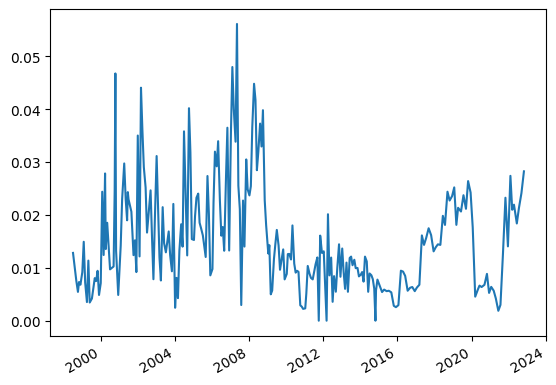

In [131]:
df['S_labour'].plot()

# supervised BERT topic

In [34]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

In [21]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression

In [35]:
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]

In [45]:
lst_topic_seeds = [
  ['term', 'condition',  'area',  'conference',  'corporation'],
  ['risk',  'outlook',  'assessment',  'credit',  'loan'],
  ['interest',  'prices',  'household',  'inflation',  'expectation']
]

In [46]:
txts = [" ".join([i.lemma_.lower() for i in doc if not (i.is_stop or i.is_punct or i.is_currency or i.is_bracket)]) for doc in lst_docs]

In [47]:
start = time.time()
topic_model = BERTopic(seed_topic_list=lst_topic_seeds, )
topics, probs = topic_model.fit_transform(txts)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
time.time() - start

In [ ]:
df = pd.DataFrame(data=[topics, probs], index=['topic', 'prob']).T
df.index.name = 'doc'

In [ ]:
df.topic.value_counts()